# prepare data for testing regression model

In [ ]:
# breast cancer datset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.target[[10, 50, 85]]

array([0, 1, 0])

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
X_test=data.data
y_test= data.target

In [ ]:
# make data for classification
from sklearn.datasets import make_classification
from matplotlib import pyplot
# 
X_test, y_test = make_classification(n_samples=1500, n_features=5, n_informative=3, n_redundant=0, n_repeated=0, n_classes=2)
y_test

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
import numpy as np
import torch
X_test = torch.from_numpy(X_test.astype(np.float32))
X_test.shape

y_test = torch.from_numpy(y_test.reshape(-1,1).astype(np.float32))
y_test.shape

torch.Size([569, 1])

In [ ]:
X_test.shape

torch.Size([569, 30])

# make model using pytorch

In [ ]:
import torch
import torch.nn as nn

# define logistic regression  model
n_input, n_out, batch_size, learning_rate = 30, 1, 100, 0.01

class LogisticRegression(object):
    def __init__(self, use_framework='pytorch'):
        self.lr= 0.01
        self.use_framework= use_framework
        self.model=None
    def fit(self):
      #training process


    def predict(self):
      #pred
      pred = self.model()


model = nn.Sequential(
                    nn.Linear(n_input, n_out),
                    nn.Sigmoid())

# define loss function and optimzer on how to upgrade the gradient
loss_function = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# actual training is happening
losses = []
for epoch in range(1500):
    bs=10
    n=569//bs
    for i in range(n):
        y_pred = model(X_test)
        loss = loss_function(y_pred, y_test)
        model.zero_grad()
        loss.backward()
        optimizer.step()
    losses.append(loss.item())

In [ ]:
y_test.reshape(150)

tensor([0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
        1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
        0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
        1., 1., 0., 1., 1., 1.])

In [ ]:
y_pred.shape

torch.Size([10, 1])

# check what we get after training

In [ ]:
# weight and bias (w,b)
for name, param in model.named_parameters():
    print(name, param)

0.weight Parameter containing:
tensor([[-1.4843e-01,  5.3948e-02, -3.4343e-01, -2.3441e+00, -1.5887e-01,
         -7.3630e-02,  1.6024e-01, -1.5530e-01, -1.8222e-01,  1.0436e-01,
         -1.3827e-01,  8.2396e-02,  5.0658e-02, -2.0022e-01,  1.5857e-01,
          9.5437e-02, -1.6041e-03, -2.9887e-02,  1.5140e-01,  1.3605e-02,
         -6.1947e-03, -1.3258e-02, -2.8770e-01, -3.5716e+00, -5.4047e-02,
         -4.5895e-02,  2.2609e-02,  9.7999e-02,  4.1491e-02,  7.6202e-02]],
       requires_grad=True)
0.bias Parameter containing:
tensor([-0.1176], requires_grad=True)


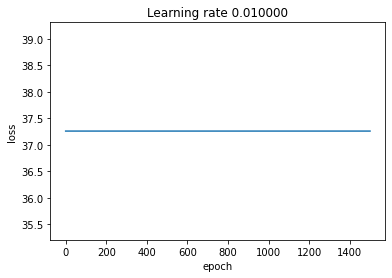

In [ ]:
# visualize the loss during each epoch
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()

# validate model

In [ ]:
X_val, y_val = X_test[500:,:], y_test[500:, :]


In [ ]:
y_pred =model(X_val)

In [ ]:
y_pred =y_pred.detach().numpy().reshape(-1,1)

In [ ]:
y_pred =[0 if i<0.5 else 1 for i in y_pred]

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred)

0.7536231884057971